Tutorial 3: Feature Detection and Description

**Types of Feature Detection:**

*   Harris Corner Detection
*   Shi-Tomasi Corner Detector & Good Features to Track
*   Introduction to SIFT (Scale-Invariant Feature Transform)
*   Introduction to SURF (Speeded-Up Robust Features)
*   FAST Algorithm for Corner Detection
*   BRIEF (Binary Robust Independent Elementary Features)

*   ORB (Oriented FAST and Rotated BRIEF)
*   Feature Matching
*   Feature Matching + Homography to find Objects


In [2]:
# IMPORTS
import cv2
# NOTE: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# to crash; see https://github.com/jupyter/notebook/issues/3935 as a substitution
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

Hough Line Transform

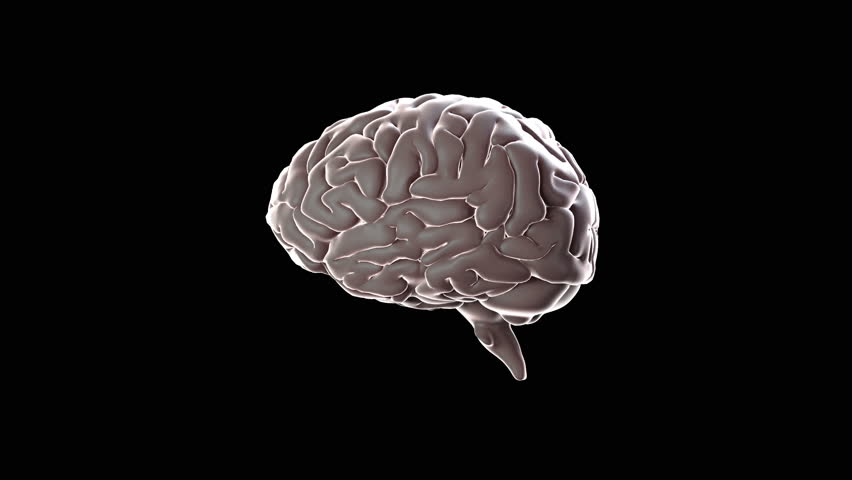

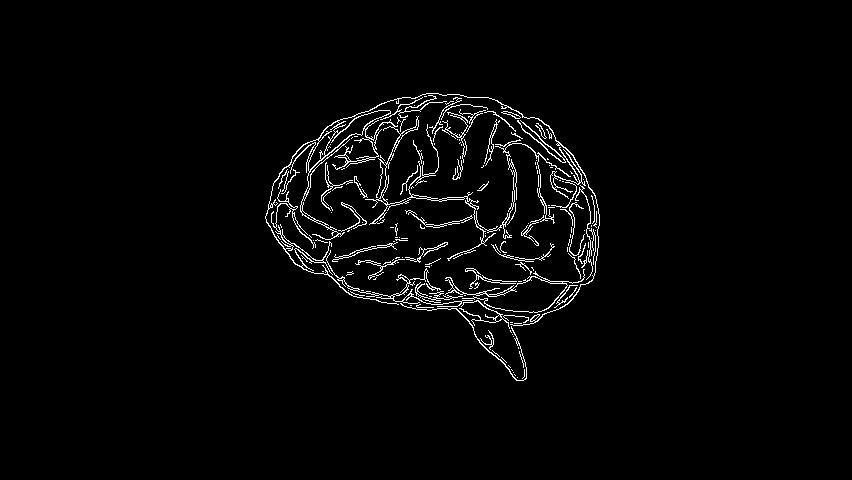

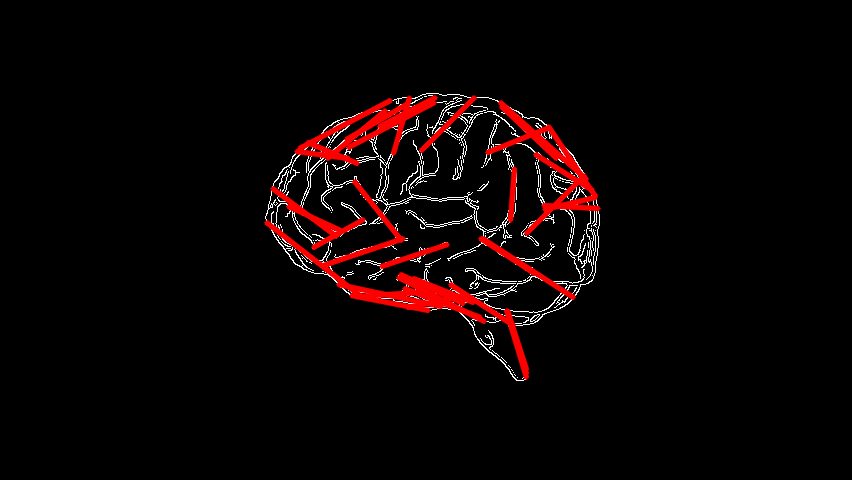

In [ ]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
def main(argv):
    
    default_file = 'sudoku.png'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/brainshadow.jpg")
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    # source
    cv2_imshow(src)

    # "Detected Lines (in red) - Standard Hough Line Transform"
    cv2_imshow(cdst)
    # Detected Lines (in red) - Probabilistic Line Transform
    cv2_imshow(cdstP)
    
    cv.waitKey()
    return 0
    
if __name__ == "__main__":
    main(sys.argv[1:])

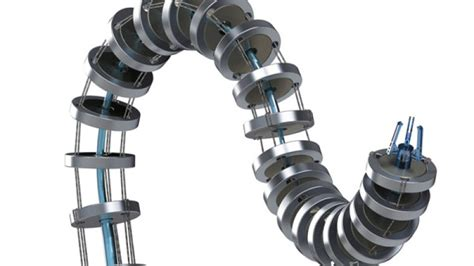

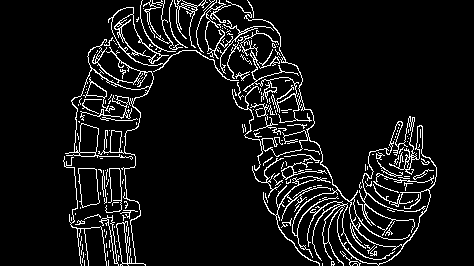

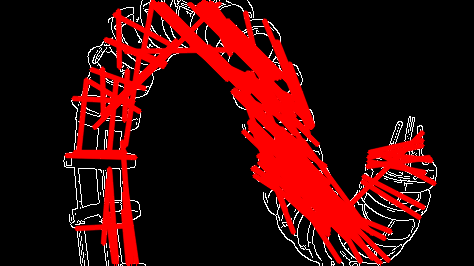

In [ ]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np
def main(argv):
    
    default_file = 'sudoku.png'
    filename = argv[0] if len(argv) > 0 else default_file
    # Loads an image
    src = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/crl.jpg")
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    # source
    cv2_imshow(src)

    # "Detected Lines (in red) - Standard Hough Line Transform"
    cv2_imshow(cdst)
    # Detected Lines (in red) - Probabilistic Line Transform
    cv2_imshow(cdstP)
    
    cv.waitKey()
    return 0
    
if __name__ == "__main__":
    main(sys.argv[1:])

Harris Corner Detection

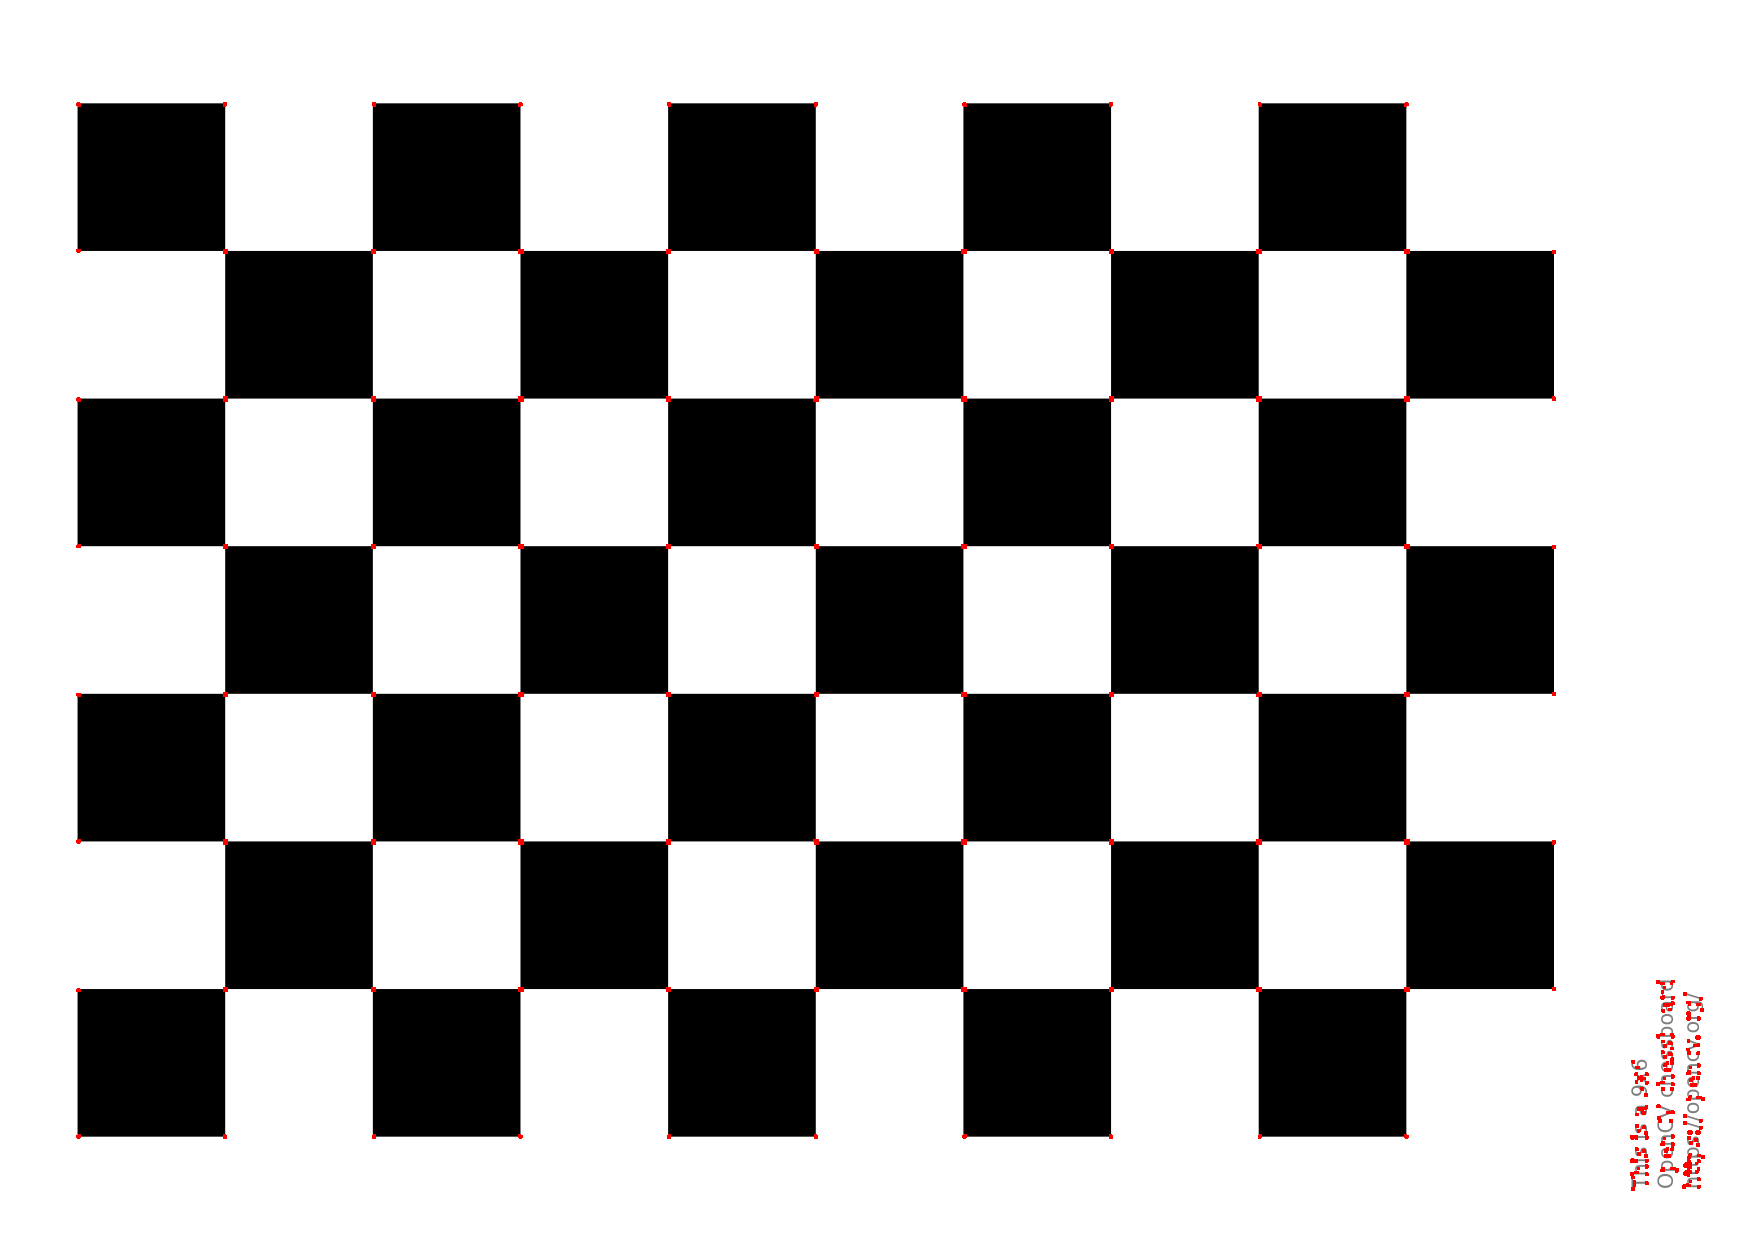

In [13]:
img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/chessboard.png")

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

gray1 = np.float32(gray1)

dst11 = cv2.cornerHarris(gray1,2,3,0.04)

#result is dilated for marking the corners, not important
dst1 = cv2.dilate(dst11,None)

# Threshold for an optimal value, it may vary depending on the image.
img1[dst1>0.01*dst11.max()]=[0,0,255]

cv2_imshow(img1)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

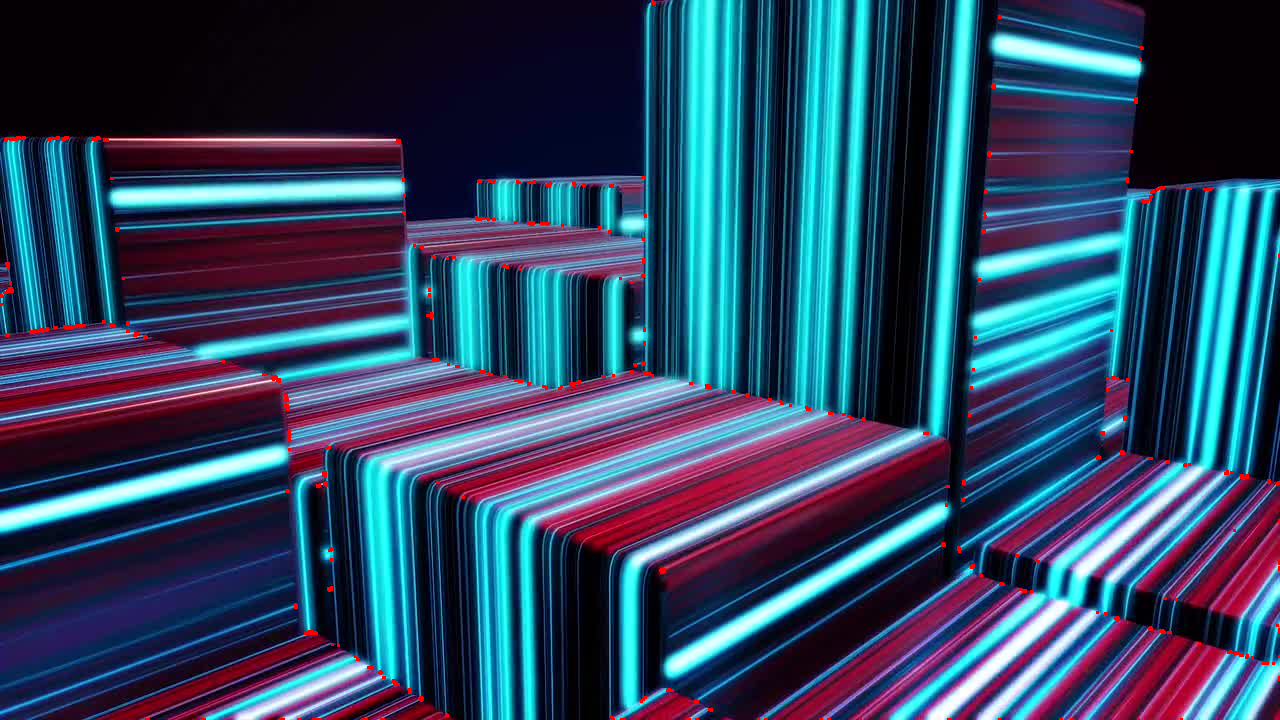

In [12]:
img2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/neoncubes.jpg")

gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

gray2 = np.float32(gray2)

dst22 = cv2.cornerHarris(gray2,2,3,0.04)

#result is dilated for marking the corners, not important
dst2 = cv2.dilate(dst22,None)

# Threshold for an optimal value, it may vary depending on the image.
img2[dst2>0.01*dst22.max()]=[0,0,255]

cv2_imshow(img2)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

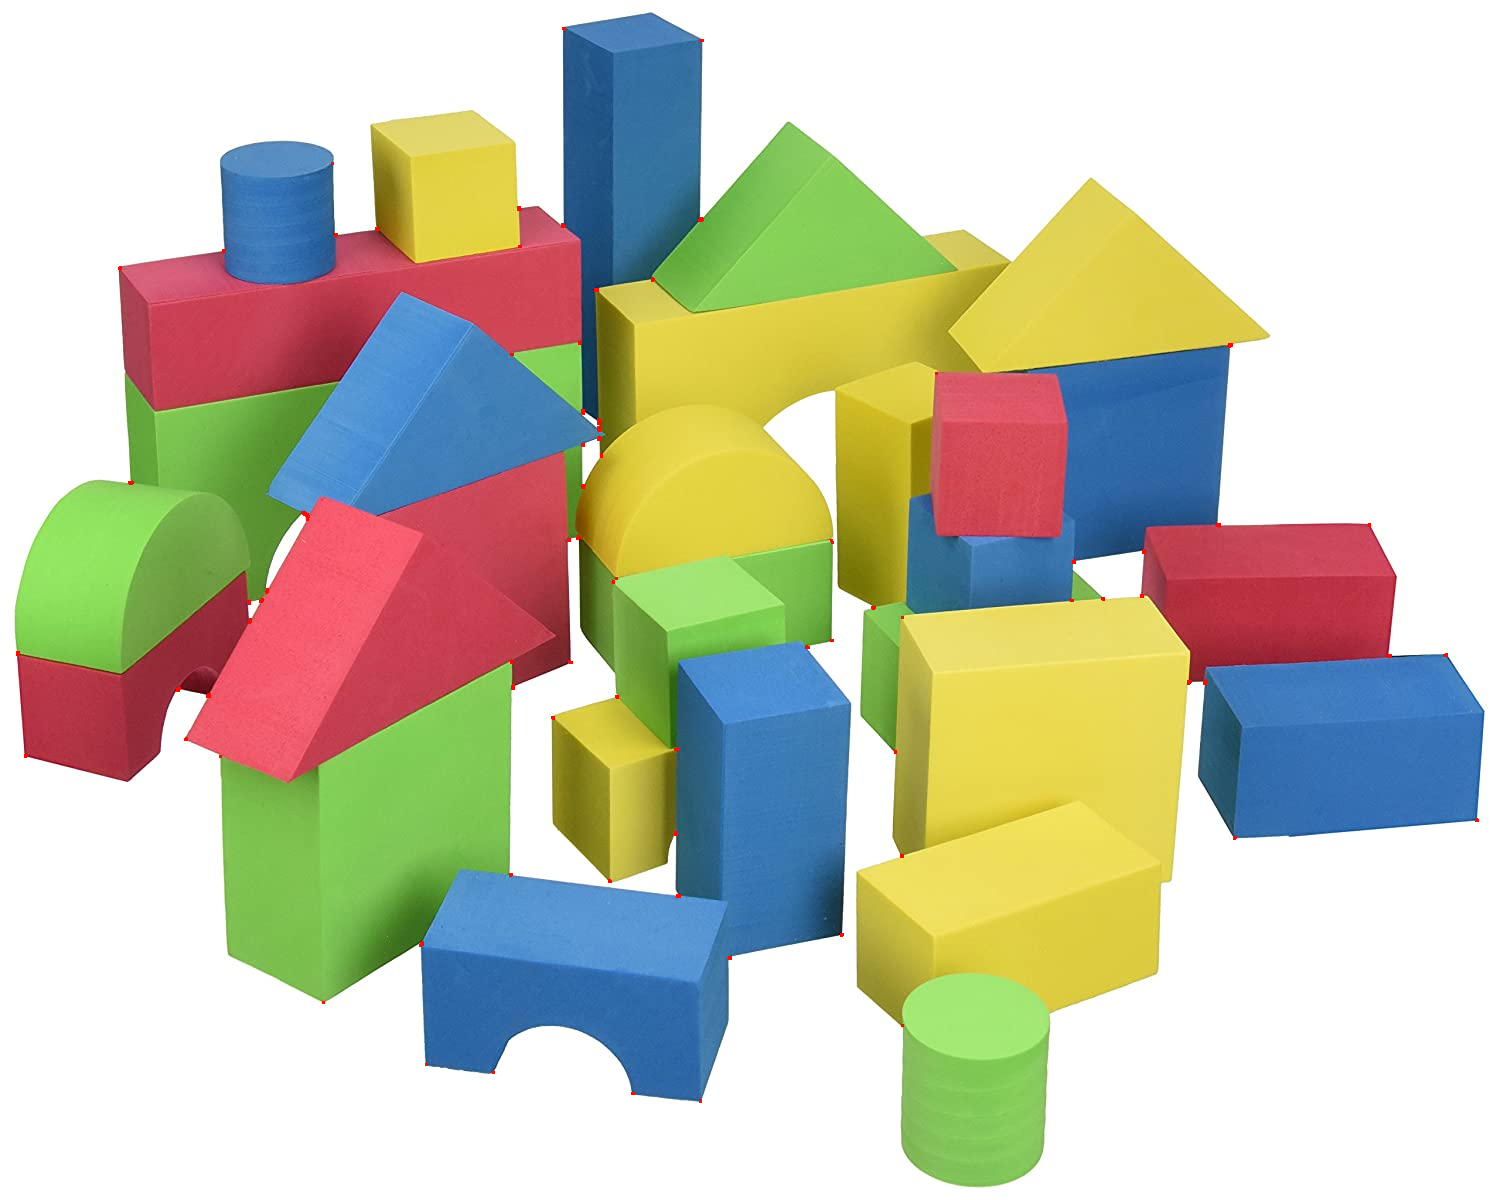

In [22]:
img3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/buildblocks.jpg")

gray3 = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

gray3 = np.float32(gray3)

dst33 = cv2.cornerHarris(gray3,2,3,0.04)

#result is dilated for marking the corners, not important
dst3 = cv2.dilate(dst33,None)

# Threshold for an optimal value, it may vary depending on the image.
img3[dst3>0.01*dst33.max()]=[0,10,255]

cv2_imshow(img3)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

Corner with SubPixel Accuracy

In [23]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/chessboard.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)

True

Shi-Tomasi Corner Detector & Good Features to Track



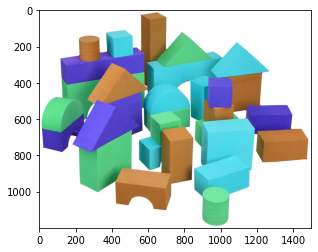

(<matplotlib.image.AxesImage at 0x7f171a2f6490>, None)

In [25]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/buildblocks.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

Introduction to SURF (Speeded-Up Robust Features)


In [26]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/ladybug.jpg")
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv2.SURF(400)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)

len(kp)

AttributeError: ignored

In [ ]:
# Check present Hessian threshold
print (surf.hessianThreshold)

In [ ]:
# We set it to some 50000. Remember, it is just for representing in picture.
# In actual cases, it is better to have a value 300-500
surf.hessianThreshold = 50000

# Again compute keypoints and check its number.
kp, des = surf.detectAndCompute(img,None)

print (len(kp))

In [ ]:
# lady bug spots are <50, so:

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)

plt.imshow(img2),plt.show()

U-SURF (so that it won’t find the orientation + faster if you don't need to account for orientation)

In [ ]:
# Check upright flag, if it False, set it to True
print (surf.upright)

In [ ]:
surf.upright = True

# Recompute the feature points and draw it
kp = surf.detect(img,None)
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)

plt.imshow(img2),plt.show()

In [ ]:
# Finally we check the descriptor size and change it to 128 if it is only 64-dim.
# Find size of descriptor
print (surf.descriptorSize())

In [ ]:
# That means flag, "extended" is False.
surf.extended

In [ ]:
# So we make it to True to get 128-dim descriptors.
surf.extended = True
kp, des = surf.detectAndCompute(img,None)

In [ ]:
print (surf.descriptorSize())

In [ ]:
print (des.shape)

FAST Algorithm for Corner Detection

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/buildblocks.jpg")

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, color=(255,0,0))

# Print all default params
print "Threshold: ", fast.getInt('threshold')
print "nonmaxSuppression: ", fast.getBool('nonmaxSuppression')
print "neighborhood: ", fast.getInt('type')
print "Total Keypoints with nonmaxSuppression: ", len(kp)

cv2.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setBool('nonmaxSuppression',0)
kp = fast.detect(img,None)

print "Total Keypoints without nonmaxSuppression: ", len(kp)

img3 = cv2.drawKeypoints(img, kp, color=(255,0,0))

cv2.imwrite('fast_false.png',img3)

BRIEF (Binary Robust Independent Elementary Features)

In [ ]:
img = cv2.imread('simple.jpg',0)

# Initiate STAR detector
star = cv2.FeatureDetector_create("STAR")

# Initiate BRIEF extractor
brief = cv2.DescriptorExtractor_create("BRIEF")

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)

print (brief.getInt('bytes'))
print (des.shape)

ORB (Oriented FAST and Rotated BRIEF)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CRL tutorials/photos/buildblocks.jpg")

# Initiate STAR detector
orb = cv2.ORB()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

Feature Matching

Feature Matching + Homography to find Objects